# BWT - Deep Learning Track
## Task#28: Convolutional Neural Networks (1D & 2D) & Pooling, Build a Convnet from Scratch using TensorFlow
### Adil Mubashir Chaudhry


#### Introduction to  Convnets

A convnet (convolutional neural network) is a type of deep learning model almost universally used for computer vision applications. In this notebook we'll explore convnets and why they are so successful in computer vision tasks

Below is an example of how a small convent is instantiated

In [1]:
from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

#### The Convolution Operation

The fundamental difference between a densely connected layer and a convolution
layer is this: Dense layers learn global patterns in their input feature space (for example,for a MNIST digit, patterns involving all pixels), whereas convolution layers learn local patterns (see figure 5.1): in the case of images, patterns found in small 2D windowsof the inputs. In the previous example, these windows were all 3 × 3.

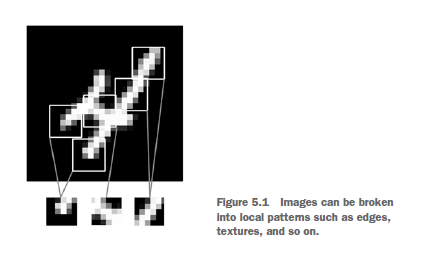


This key characteristic gives convnets two interesting properties:
-  The patterns they learn are translation invariant. After learning a certain pattern in the lower-right corner of a picture, a convnet can recognize it anywhere: for example, in the upper-left corner. A densely connected network would have to learn the pattern anew if it appeared at a new location. This makes convnets data efficient when processing images (because the visual world is fundamentally translation invariant): they need fewer training samples to learn representations that have generalization power.
-  They can learn spatial hierarchies of patterns (see figure 5.2). A first convolution layer will learn small local patterns such as edges, a second convolution layer will learn larger patterns made of the features of the first layers, and so on. This allows convnets to efficiently learn increasingly complex and abstract visual concepts (because the visual world is fundamentally spatially hierarchical).

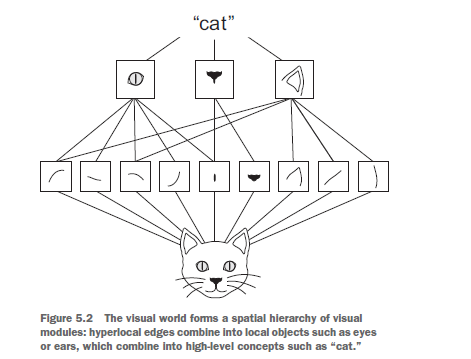


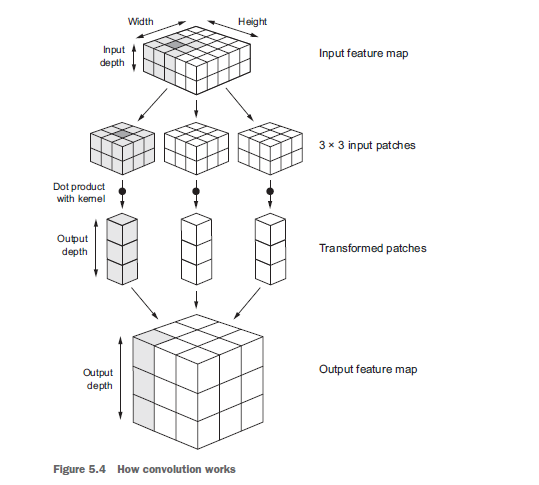

#### Max-Pooling Operation

In the convnet example, you may have noticed that the size of the feature maps is
halved after every MaxPooling2D layer. For instance, before the first MaxPooling2D layers,
the feature map is 26 × 26, but the max-pooling operation halves it to 13 × 13.
That’s the role of max pooling: to aggressively downsample feature maps, much like
strided convolutions.

### Training a convnet from scratch on a small dataset

In [2]:
import os, shutil
original_dataset_dir = '/Users/adilm/Downloads/kaggle_original_data/test1/test1'
base_dir = '/Users/adilm/Downloads/cats_and_dogs_small'

os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
    
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
    
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
    
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
    
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [4]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 128)     

In [5]:
from keras import optimizers
model.compile(loss='binary_crossentropy',

optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

C:\Users\adilm\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
            train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
history = model.fit_generator(
    train_generator, steps_per_epoch=50, epochs=5,validation_data=validation_generator, 
    validation_steps=50)

Epoch 1/5


C:\Users\adilm\AppData\Local\Temp\ipykernel_9992\909114870.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


50/50 [==============================] - 16s 313ms/step - loss: 0.6981 - acc: 0.5000 - val_loss: 0.6855 - val_acc: 0.5000
Epoch 2/5
50/50 [==============================] - 16s 316ms/step - loss: 0.6817 - acc: 0.5660 - val_loss: 0.6679 - val_acc: 0.5780
Epoch 3/5
50/50 [==============================] - 16s 324ms/step - loss: 0.6589 - acc: 0.6200 - val_loss: 0.6579 - val_acc: 0.6030
Epoch 4/5
50/50 [==============================] - 17s 337ms/step - loss: 0.6420 - acc: 0.6460 - val_loss: 0.6321 - val_acc: 0.6370
Epoch 5/5
50/50 [==============================] - 18s 363ms/step - loss: 0.6128 - acc: 0.6630 - val_loss: 0.6205 - val_acc: 0.6530


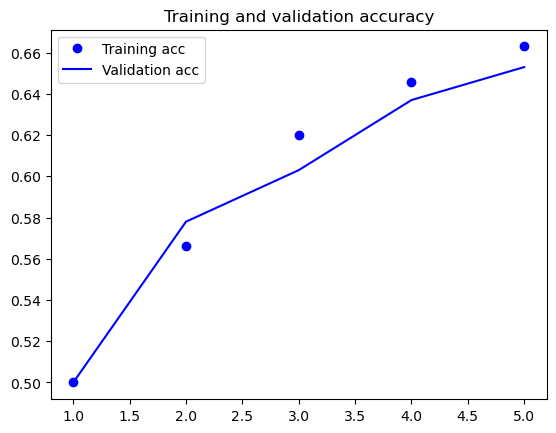

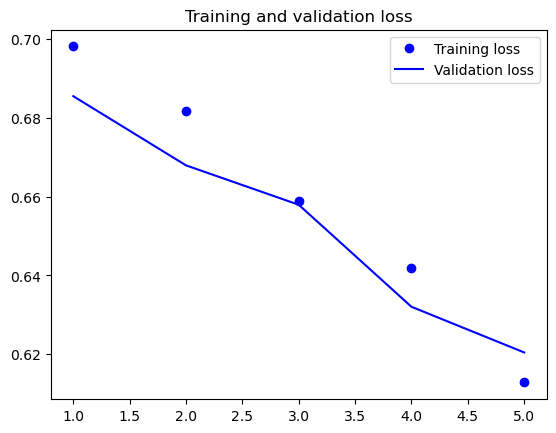

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

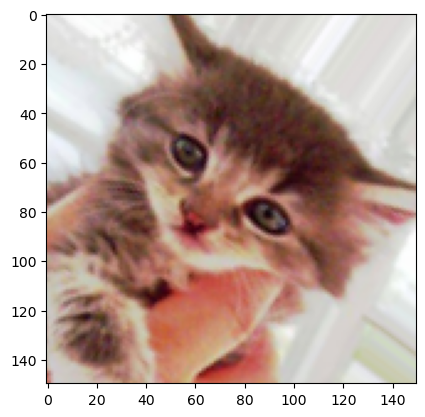

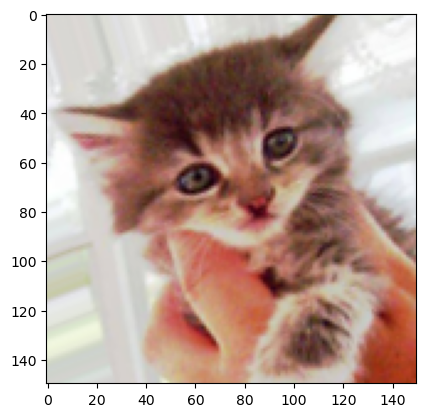

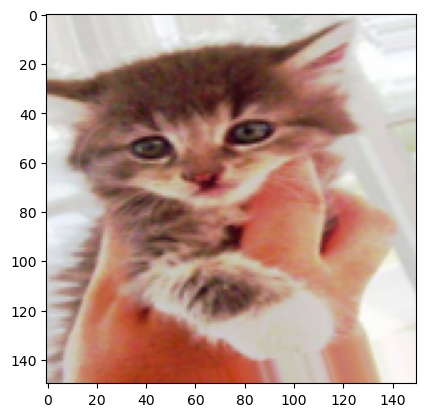

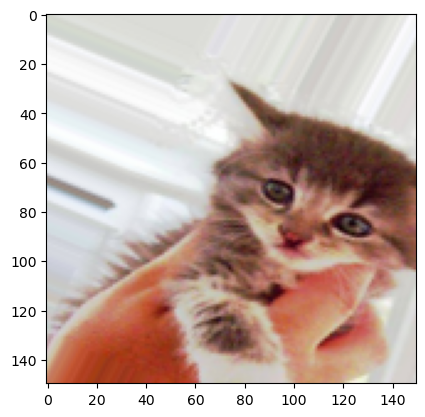

In [9]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                              zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

from tensorflow.keras.preprocessing.image import load_img

fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
#img = image.load_img(img_path, target_size=(150, 150))

from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

image = Image.open(img_path)
image = image.resize((150, 150))  

x = img_to_array(image)
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',

optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

C:\Users\adilm\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


C:\Users\adilm\AppData\Local\Temp\ipykernel_9992\2070810647.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
50/50 [==============================] - 28s 539ms/step - loss: 0.6966 - acc: 0.4994 - val_loss: 0.6907 - val_acc: 0.5000
Epoch 2/5
50/50 [==============================] - 22s 444ms/step - loss: 0.6881 - acc: 0.5391
Epoch 3/5
50/50 [==============================] - 23s 459ms/step - loss: 0.6819 - acc: 0.5606
Epoch 4/5
50/50 [==============================] - 23s 464ms/step - loss: 0.6733 - acc: 0.5682
Epoch 5/5
50/50 [==============================] - 24s 473ms/step - loss: 0.6761 - acc: 0.5751
